# Bot detection exercise

We are worried about scrappers hitting our site and collecting pricing data! Stop them!

First lets get an idea about how people act on our site

In [17]:
import pykafka
from collections import Counter

docker_ip = '192.168.99.100'
client = pykafka.KafkaClient(hosts="{}:9092".format(docker_ip))

In [18]:
topic = client.topics['visit_log']
consumer = topic.get_simple_consumer()

In [23]:
%%time
counter = Counter()
count = 0

while True:
    message = consumer.consume(block=False)
    if not message:
        break
    # YOUR CODE HERE
    user_id = message.value.split(':')[1]
    counter[user_id] += 1
    count += 1
print "We counsumed: {} messages".format(count)

We counsumed: 50000 messages
CPU times: user 2.7 s, sys: 1.87 s, total: 4.57 s
Wall time: 3.26 s


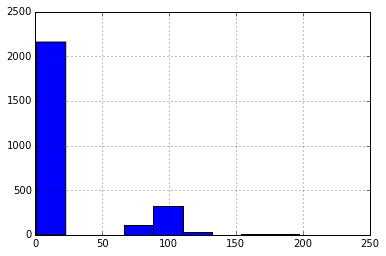

In [24]:
%matplotlib inline
import pandas as pd
pd.Series(counter.values()).hist()